In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [4]:
df = pd.read_csv("../data/performance_data.csv")

In [5]:
df.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [7]:
df.shape

(905, 4)

In [8]:
df.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


In [9]:
print(df.info())  # Get information about the dataframe, such as data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB
None


In [10]:
print(df.isnull().sum())

game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64


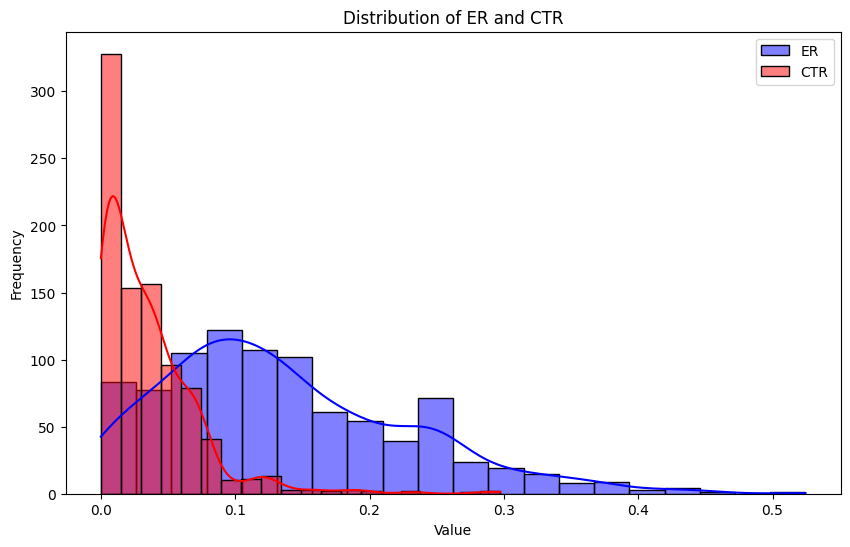

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ER'], bins=20, kde=True, color='blue', label='ER')
sns.histplot(df['CTR'], bins=20, kde=True, color='red', label='CTR')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of ER and CTR')
plt.legend()
plt.show()

/tmp/ipykernel_6489/255283507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Variable', y='Value', data=df_melted, palette=['blue', 'red'])


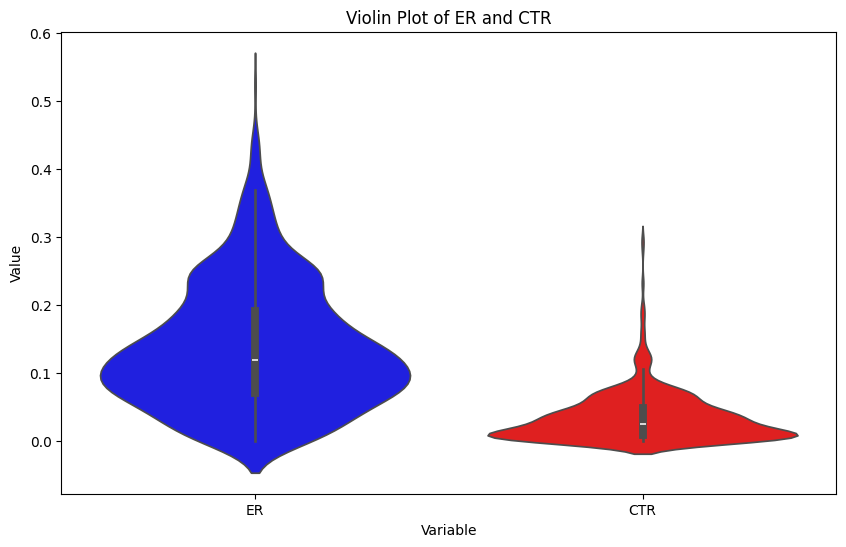

In [19]:
# Melt the DataFrame to have a long-form structure suitable for seaborn
df_melted = df.melt(value_vars=['ER', 'CTR'], var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Variable', y='Value', data=df_melted, palette=['blue', 'red'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Violin Plot of ER and CTR')
plt.show()

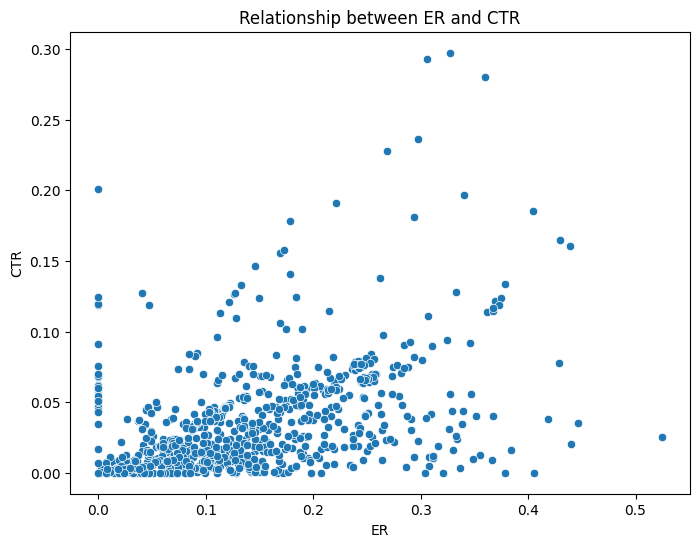

In [13]:
# Assuming df is your DataFrame and it is already defined
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ER', y='CTR', data=df)
plt.xlabel('ER')
plt.ylabel('CTR')
plt.title('Relationship between ER and CTR')
plt.show()

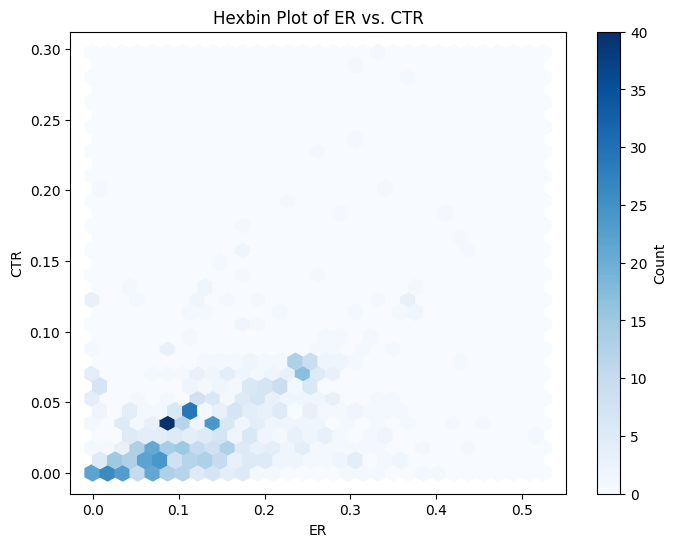

In [20]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['ER'], df['CTR'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('ER')
plt.ylabel('CTR')
plt.title('Hexbin Plot of ER vs. CTR')
plt.show()

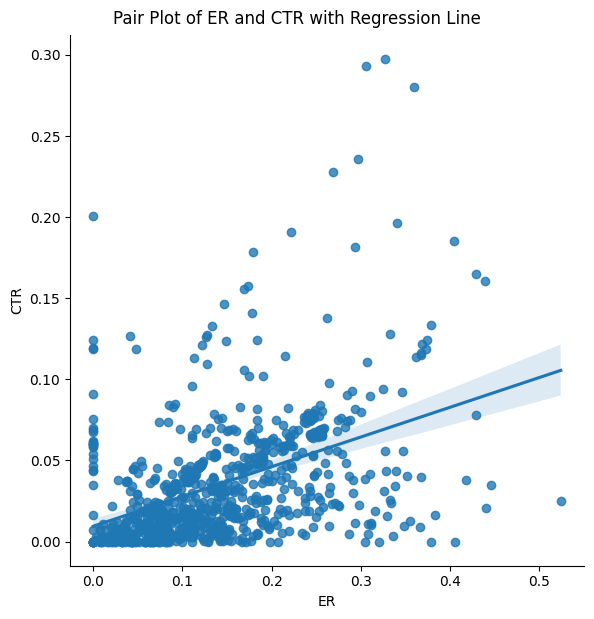

In [22]:
sns.pairplot(df, x_vars=['ER'], y_vars=['CTR'], height=6, kind='reg')
plt.suptitle('Pair Plot of ER and CTR with Regression Line', y=1.02)
plt.show()

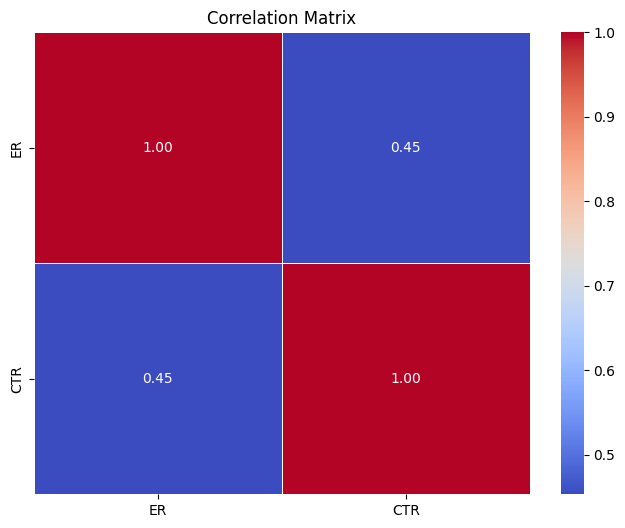

In [14]:
# Assuming df is your DataFrame and it is already defined
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

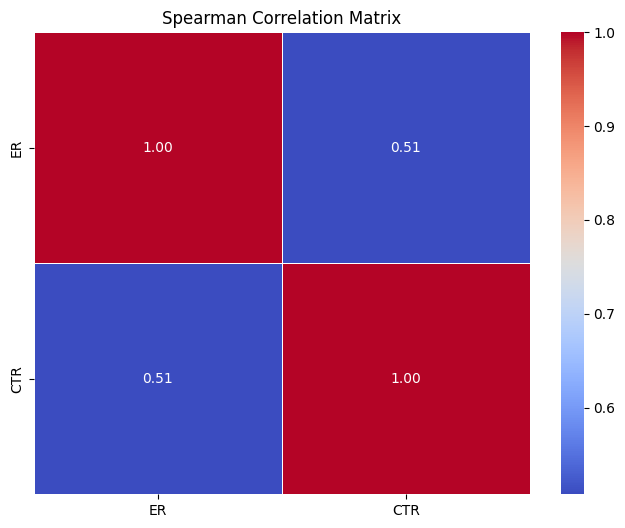

In [15]:
# Compute Spearman correlation matrix
spearman_corr = numeric_columns.corr(method='spearman')

# Plot Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()


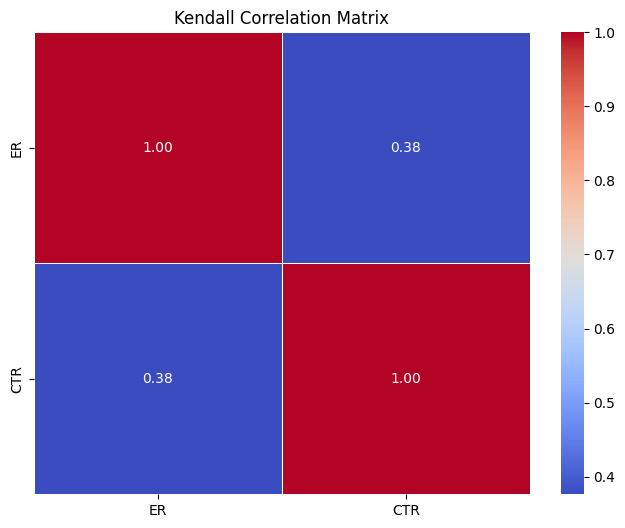

In [17]:
# Compute Kendall correlation matrix
kendall_corr = numeric_columns.corr(method='kendall')

# Plot Kendall correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Kendall Correlation Matrix')
plt.show()


In [4]:
df1 = pd.read_json('../data/concepts.json')

In [6]:
df1.head(4)

,concept,implementation,explanation,asset_suggestions
0,Escape Challenge Teaser,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
1,Interactive Storytelling,{'frame_1': {'description': 'The ad opens with...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
2,City Tour,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
3,Interactive Globe Journey,{'frame_1': {'description': 'The ad opens with...,This concept aligns with the brand's identity ...,[{'frame_1': {'3D Globe': 'A high-definition 3...


In [8]:
df1['implementation'][10]

{'frame_1': {'description': "The ad begins with a LEGO CITY scene in chaos, with the text 'Can you escape?' appearing. The LEGO logo and the LEGO CITY 2024 product line logo are displayed.",
  'interaction_type': 'Tap',
  'next_frame': 'frame_2',
  'duration': '3 seconds'},
 'frame_2': {'description': 'The scene transitions to a LEGO character in a tricky situation. Two options appear for the user to choose how the character should proceed.',
  'interaction_type': 'Choice Selection',
  'next_frame': 'frame_3',
  'duration': '5 seconds'},
 'frame_3': {'description': 'The chosen scenario plays out, leading to another situation where the user has to make a choice.',
  'interaction_type': 'Choice Selection',
  'next_frame': 'frame_4',
  'duration': '5 seconds'},
 'frame_4': {'description': "The final outcome of the story is shown based on the user's choices. The call-to-action 'Create Your Own Adventure in LEGO CITY' appears.",
  'interaction_type': 'Tap',
  'next_frame': 'end-of-advertise

In [9]:
df1['asset_suggestions'][2][2]

{'frame_1': {'Background': 'A vibrant, detailed image of a LEGO CITY set, showcasing key features like buildings, vehicles, and mini-figures',
  'Interactive Element': "'Choose Your Adventure' prompt, a large, colorful button placed strategically to draw attention",
  'Logo': 'LEGO logo placed subtly in the corner to reinforce brand recognition'},
 'frame_2': {'Animation': 'A unique, engaging animation that brings the chosen part of the city to life, highlighting the fun and creativity of LEGO CITY',
  'Interactive Element': 'Swipe functionality to allow users to navigate through the story',
  'Text': "Brief, compelling text that narrates the story and enhances the viewer's immersion"},
 'frame_3': {'CTA': "'Continue the Adventure' button, designed to be eye-catching and compelling, prompting users to visit the LEGO website",
  'Ending Scene': 'A cliffhanger scene that leaves viewers eager to continue the adventure',
  'Logo': 'LEGO logo, slightly more prominent to reinforce brand iden

In [10]:
df1['explanation'][2]

"This concept aligns with LEGO CITY's brand identity of providing a taste of city life experiences. It appeals to the target demographic's interest in exploration and discovery, and it achieves the campaign's objectives of enhancing audience engagement, increasing product and brand awareness, and driving traffic to the brand's website. The concept is scalable and can be adapted for various platforms and audiences. It can be executed within the given budget constraints."

In [11]:
for i in df1['asset_suggestions'][0][0]:
    print(df1['asset_suggestions'][0][0][i])

{'Background Animation': "A suspenseful animation of a LEGO CITY set, with buildings, vehicles, and mini-figures coming to life in a dynamic, 3D environment. The animation is designed to captivate the viewer's attention and set the stage for the upcoming challenge.", 'Tagline': "'YOUR CITY, NO LIMITS' appears in bold, vibrant letters, reinforcing the campaign's theme of boundless creativity and adventure.", 'Countdown Timer': "A digital countdown timer, styled to resemble LEGO bricks, adds an element of suspense and anticipation, building up to the reveal of the 'ULTIMATE ESCAPE CHALLENGE'."}
{'Video Clips': "A series of quick, exciting clips showcasing various challenges in the 'ULTIMATE ESCAPE CHALLENGE'. Each clip features different LEGO CITY sets and mini-figures, highlighting the diversity and expansiveness of the LEGO CITY universe.", 'Swipe Indicator': 'A subtle, animated swipe indicator encourages viewers to interact with the ad and explore the different challenges.'}
{'Logo': 

In [13]:
asset_categories = defaultdict(int)
for suggestion in df1['asset_suggestions']:
    for frames in suggestion:
        for frame in frames:
            if type(frames[frame]) == dict:
                for index in frames[frame].keys():
                    asset_categories[index] += 1

In [14]:
asset_categories = sorted(asset_categories.items(), reverse=True, key=lambda x:x[1])
asset_categories

[('Background', 530),
 ('Interactive Element', 340),
 ('Logo', 287),
 ('Product Image', 251),
 ('CTA', 231),
 ('Text', 184),
 ('Headline Text', 159),
 ('Background Image', 146),
 ('Brand Logo', 117),
 ('Text Overlay', 77),
 ('Foreground', 71),
 ('Animation', 61),
 ('CTA Button', 54),
 ('Interaction', 39),
 ('Engagement Text', 37),
 ('Engagement Visual', 33),
 ('Product Close-up', 28),
 ('Tagline', 26),
 ('Swipe Indicator', 25),
 ('CTA Text', 24),
 ('Interactive Elements', 24),
 ('Overlay Text', 21),
 ('Interactive Text', 18),
 ('Product Feature Highlight', 17),
 ('Background Animation', 16),
 ('Main Character', 16),
 ('Voiceover', 15),
 ('Product', 15),
 ('Main Visual', 15),
 ('Main Product', 15),
 ('Countdown Timer', 13),
 ('Video Clips', 13),
 ('Toolbox', 13),
 ('Sound Effects', 13),
 ('Ending Scene', 13),
 ('Animated Cat', 13),
 ('Product Highlight', 12),
 ('Special Offer', 12),
 ('Adludio Logo', 12),
 ('Interactive Prompt', 12),
 ('Image Gallery', 12),
 ('Main Focus', 12),
 ('Inter

In [15]:
top_10_asset_categories = asset_categories[:10]
for category in top_10_asset_categories:
    print(category)

('Background', 530)
('Interactive Element', 340)
('Logo', 287)
('Product Image', 251)
('CTA', 231)
('Text', 184)
('Headline Text', 159)
('Background Image', 146)
('Brand Logo', 117)
('Text Overlay', 77)


In [16]:
pd.DataFrame(top_10_asset_categories)

,0,1
0,Background,530
1,Interactive Element,340
2,Logo,287
3,Product Image,251
4,CTA,231
5,Text,184
6,Headline Text,159
7,Background Image,146
8,Brand Logo,117
9,Text Overlay,77


<Figure size 1000x600 with 0 Axes>

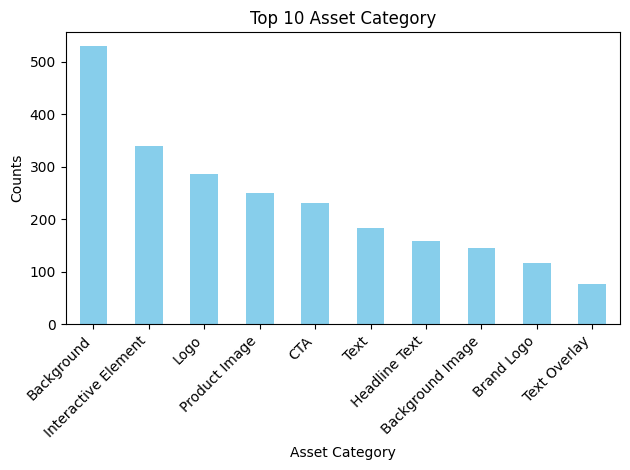

In [17]:
plt.figure(figsize=(10,6))
top_10_asset_categories = asset_categories[:10]
data = pd.DataFrame(top_10_asset_categories, columns=['Asset Category', 'Counts'])
# Plot the data
data.plot(kind='bar', x='Asset Category', y='Counts', legend=False, color='skyblue')
# Add title and labels
plt.title('Top 10 Asset Category')
plt.xlabel('Asset Category')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
# Show plot
plt.tight_layout()
plt.show()

In [18]:
df1['implementation'][0]

{'frame_1': {'description': "The ad begins with a suspenseful animation of a LEGO CITY set, with the tagline 'YOUR CITY, NO LIMITS' and a countdown timer.",
  'interaction_type': 'Tap',
  'next_frame': 'frame_2',
  'duration': '5 seconds'},
 'frame_2': {'description': "The scene transitions to a series of quick, exciting clips showcasing various challenges in the 'ULTIMATE ESCAPE CHALLENGE'.",
  'interaction_type': 'Swipe',
  'next_frame': 'frame_3',
  'duration': '10 seconds'},
 'frame_3': {'description': "The final frame reveals the LEGO CITY 2024 logo and a 'Play Now' button, inviting users to join the challenge on the LEGO website.",
  'interaction_type': 'Tap',
  'next_frame': 'end-of-advertisement',
  'duration': '5 seconds'}}

In [19]:
for implementation in df1['implementation'].head():
    #print(implementation)
    for frame in implementation:
        print(implementation[frame])

{'description': "The ad begins with a suspenseful animation of a LEGO CITY set, with the tagline 'YOUR CITY, NO LIMITS' and a countdown timer.", 'interaction_type': 'Tap', 'next_frame': 'frame_2', 'duration': '5 seconds'}
{'description': "The scene transitions to a series of quick, exciting clips showcasing various challenges in the 'ULTIMATE ESCAPE CHALLENGE'.", 'interaction_type': 'Swipe', 'next_frame': 'frame_3', 'duration': '10 seconds'}
{'description': "The final frame reveals the LEGO CITY 2024 logo and a 'Play Now' button, inviting users to join the challenge on the LEGO website.", 'interaction_type': 'Tap', 'next_frame': 'end-of-advertisement', 'duration': '5 seconds'}
{'description': "The ad opens with a LEGO CITY set and a 'Choose Your Adventure' prompt, inviting users to tap on different parts of the city to start their story.", 'interaction_type': 'Tap', 'next_frame': 'frame_2', 'duration': '5 seconds'}
{'description': "Depending on the user's choice, the scene transitions 

In [20]:
interaction_type = set()
for implementation in df1['implementation']:
    for frame in implementation:
        if 'interaction_type' in implementation[frame]:
            if implementation[frame]['interaction_type']:
                interaction_type.add(implementation[frame]['interaction_type'])

In [21]:
interaction_type

{'Choice Selection', 'Drag and Drop', 'None', 'Swipe', 'Tap', 'Tap and Hold'}